# **The Spark Foundation**

## **Task 1: Prediction using Supervised ML** 

## **Name:A.Amirthavarsinipriya**

## **Predict the percentage of an student based on the no. of study hours**

**In this task we will be applying SLR(simple Linear Regression).Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables**

**One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
The other variable, denoted y, is regarded as the response, outcome, or dependent variable**.

## **Python libraries**

• **Numpy – It provides a fast numerical array structure and operating functions.**

• **pandas – It provides tools for data storage, manipulation and analysis tasks.**

• **Scikit-Learn – The required machine learning library in Python.**

• **Matplotlib – It is the basic plotting library in Python. It provides tools for making plots.**

In [4]:
##Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read the dataset
url= "http://bit.ly/w-data" 
data=pd.read_csv(url)
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


## **Exploratory data analysis**

In [6]:
#Displaying first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# View the dimensions of df
print(data.shape)

(25, 2)


In [6]:
# View dataframe summary
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [7]:
# View descriptive statistics
print(data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [7]:
# Declare feature variable and target variable
X = data['Hours'].values
y = data['Scores'].values


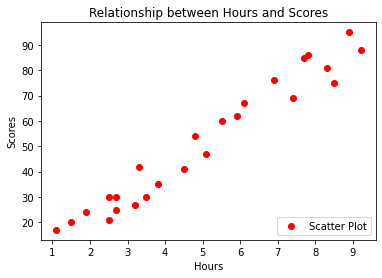

In [37]:
# Plot scatter plot between X and y
plt.scatter(X, y, color = 'red', label='Scatter Plot')
plt.title('Relationship between Hours and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()


In [9]:
#Checking dimensions of x and y
print(X.shape)
print(y.shape)

(25,)
(25,)


## Reshaping X and y

 **we are working with only one feature variable, so we need to reshape using Numpy reshape() method.
 It specifies first dimension to be -1, which means "unspecified".**

In [10]:
# Reshape X and y
X = X.reshape(-1,1)
Y = y.reshape(-1,1)
print(X.shape)
print(Y.shape)

(25, 1)
(25, 1)


In [24]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [25]:
#print the dimensions of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17, 1)
(17, 1)
(8, 1)
(8, 1)


In [26]:
#fit the linear model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# Train the model using train data sets
lm.fit(X_train,y_train)
# print model slope and intercept
a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [[9.78856669]]
Estimated model intercept, b: (array([2.37081538]),)


In [20]:
#So our fitted regression line is  y = 9.78856669 * x 2.37081538
# That is our linear model.

In [27]:
y_predict=a*9.5+b
print(y_predict)

[[95.36219891]]


In [28]:
y_predict=lm.predict(X_test)
y_predict

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

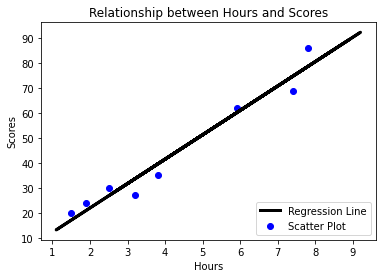

In [31]:
# Plot the Regression Line using Test set results
plt.scatter(X_test, y_test, color = 'blue', label='Scatter Plot')
plt.plot(X_train, lm.predict(X_train), color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Hours and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

In [33]:
# Calculate and print Root Mean Square Error(RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 4.7922


In [35]:
# To make an individual prediction using the linear regression model.if the student study for 9.25 hours/day 
#his predicted score is
print(lm.predict([[9.25]]))

[[92.91505723]]


In [36]:
#So the student predicted score is 92.91